In [32]:
import numpy as np
from matplotlib import pyplot as plt
import csv
import os
import glob
from functools import reduce

In [36]:
def initialize_dict(textfile, n_expected=5):
    with open(textfile, 'r') as f:
        linelist = f.readlines()
        testscores = [line for line in linelist if line[0]=='+']
        individual_scores = dict()
        try:
            lines = testscores[:n_expected]
            for l in lines:
                wordlist = l.split()
                name = reduce(lambda x, y: x+' '+y, wordlist[1:-2])
                individual_scores[name] = []
        except:
            print('cannot process file to initialize dict')
        return individual_scores

def process_textfile(textfilelist, score_dict):
    for textfile in textfilelist:
        with open(textfile, 'r') as f:
            linelist = f.readlines()
            testscores = [line for line in linelist if line[0]=='+']
            try:
                for line in testscores:
                    splitline = line.split()
                    name = reduce(lambda x, y: x+' '+y, splitline[1:-2])
                    score_dict[name] += [float(splitline[-1])]
#                 metrics = [m[1:-2] for m in testscores[0][1:].split()]
#                 assert list(score_dict.keys()) == metrics
#                 for test_img in testscores[2:]:
#                     scores = [float(s[:-1]) for s in test_img[1:].split()]
#                     for i in range(len(metrics)):
#                         score_dict[metrics[i]] += [scores[i]] 
            except:
                print('cannot process file:', textfile)
    return score_dict

def gather_test_scores(textfilelist):
    score_dict = initialize_dict(textfilelist[0])
    return process_textfile(textfilelist, score_dict)

In [59]:
def collate_model_comparisons(mtype, locroot='', separate_folds=False):
    print('\ncollating stats for base model', mtype)
    
    textfilelist = glob.glob(locroot+mtype+'/output-005-*.txt')
    print('number of files found:\t', len(textfilelist), '\n')
    
    if separate_folds:
        textfilelist_brokenstrings = [f.split('\\') for f in textfilelist]
    else:
        textfilelist_brokenstrings = [f.split('/') for f in textfilelist]
    textfilelist_dict = {}
    for idx, t in enumerate(textfilelist_brokenstrings):
        try:
            textfilelist_dict[t[0]] += [textfilelist[idx]]
        except:
            textfilelist_dict[t[0]] = [textfilelist[idx]]

    for model in textfilelist_dict:
        print(model)
        scores_dict = gather_test_scores(textfilelist_dict[model])
        plt.figure(figsize=(12,2))
        for idx, metric in enumerate(scores_dict):
            print(metric, np.mean(np.array(scores_dict[metric])), np.std(np.array(scores_dict[metric])))
            ax = plt.subplot(1,5,idx+1)
            plt.hist(scores_dict[metric], range=[0,1], bins=25)
            ax.set_title(metric)
        plt.show()
        print()
    return scores_dict

In [60]:
archs = ['unet', 'resnet', 'densenet']
pocket = ['', '-pocket']
c2Dt = ['', '-c2Dt']
modeltypes = []
for a in archs:
    for c in c2Dt:
        for p in pocket:
            modeltypes += [a+p+c]


collating stats for base model unet
number of files found:	 5 

..
DSC-L2 3D (float) 0.10039029394847782 0.06444027007600886
DSC-L2 3D (int) 0.11474634971435023 0.06865200288965381
DSC-L2 3D LCC (int) 0.07501731998713385 0.05470299457658721
DSC-L2 2D AVG (float) 0.6584841341970655 0.16317570899767775
DSC-L2 2D AVG (int) 0.3327721074024107 0.13364919973036016


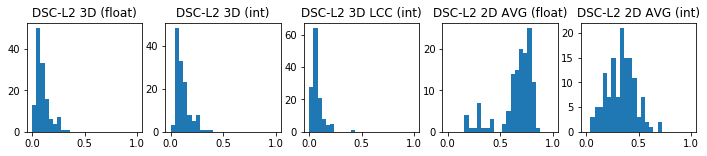



collating stats for base model unet-pocket
number of files found:	 5 

..
DSC-L2 3D (float) 0.13554352580858517 0.08674932595667814
DSC-L2 3D (int) 0.15534344499694958 0.09415688946104374
DSC-L2 3D LCC (int) 0.08479526942262844 0.06488488562608181
DSC-L2 2D AVG (float) 0.6649309527120782 0.1576295461417729
DSC-L2 2D AVG (int) 0.4580045807482699 0.16053162388323214


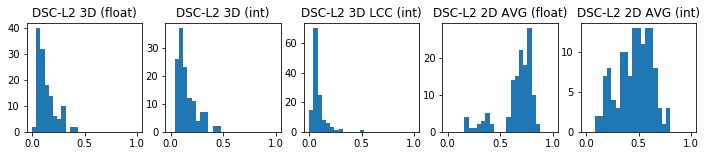



collating stats for base model unet-c2Dt
number of files found:	 5 

..
DSC-L2 3D (float) 0.18823888503116143 0.15460051027968158
DSC-L2 3D (int) 0.21139390548262274 0.16659105035768257
DSC-L2 3D LCC (int) 0.1579563251469486 0.16136867297527657
DSC-L2 2D AVG (float) 0.7022238753466429 0.11671463950843614
DSC-L2 2D AVG (int) 0.5051603703567973 0.19764158516177027


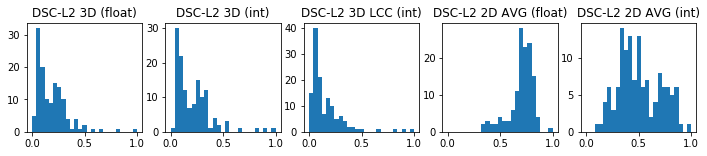



collating stats for base model unet-pocket-c2Dt
number of files found:	 5 

..
DSC-L2 3D (float) 0.12700897038106598 0.07751501240836277
DSC-L2 3D (int) 0.14718526092344136 0.0841967335774338
DSC-L2 3D LCC (int) 0.08686824700427237 0.06673514160920616
DSC-L2 2D AVG (float) 0.6635052226297621 0.1601771300609235
DSC-L2 2D AVG (int) 0.431105659495514 0.146393865337063


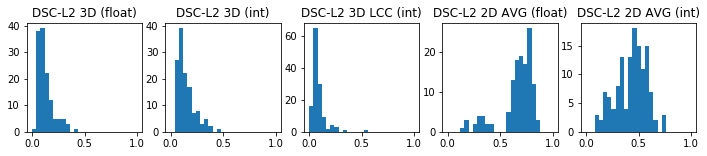



collating stats for base model resnet
number of files found:	 5 

..
DSC-L2 3D (float) 0.2863108585266574 0.3499660973525987
DSC-L2 3D (int) 0.29962855679535144 0.34436069263418995
DSC-L2 3D LCC (int) 0.2643223870189264 0.360453602173222
DSC-L2 2D AVG (float) 0.7102765878232541 0.20141609631070817
DSC-L2 2D AVG (int) 0.4911685381910396 0.26989615731873745


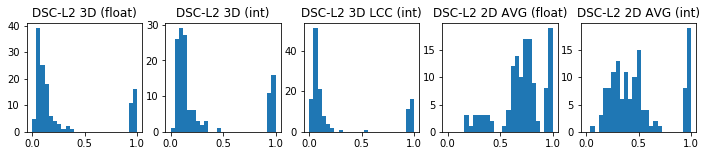



collating stats for base model resnet-pocket
number of files found:	 5 

..
DSC-L2 3D (float) 0.12884202796281413 0.07486232325392062
DSC-L2 3D (int) 0.15017459474153746 0.08174968504787154
DSC-L2 3D LCC (int) 0.0846637397186067 0.056307080533920195
DSC-L2 2D AVG (float) 0.6644807915094149 0.15913846218048217
DSC-L2 2D AVG (int) 0.44331214474243974 0.14617530413287766


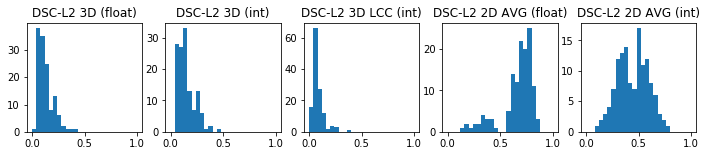



collating stats for base model resnet-c2Dt
number of files found:	 5 

..
DSC-L2 3D (float) 0.11825891379194564 0.07223894364364165
DSC-L2 3D (int) 0.13581738049801426 0.07884683186830685
DSC-L2 3D LCC (int) 0.07925669963164385 0.05640533639075507
DSC-L2 2D AVG (float) 0.6579524062651458 0.1634677200337993
DSC-L2 2D AVG (int) 0.3901091884862872 0.17827909016166751


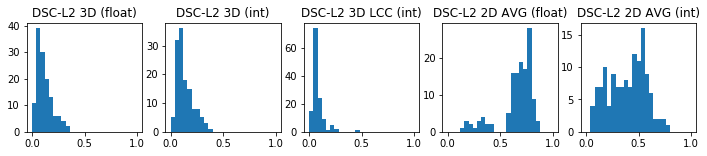



collating stats for base model resnet-pocket-c2Dt
number of files found:	 5 

..
DSC-L2 3D (float) 0.12183560651452703 0.06548077923085312
DSC-L2 3D (int) 0.14272332038049235 0.07199201019917084
DSC-L2 3D LCC (int) 0.08476775774380975 0.0505447299316626
DSC-L2 2D AVG (float) 0.6633226620594564 0.16166724823177
DSC-L2 2D AVG (int) 0.4648263741758522 0.16473664456385373


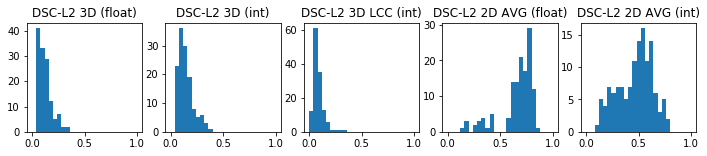



collating stats for base model densenet
number of files found:	 5 

..
DSC-L2 3D (float) 0.12902919414616593 0.08891432132743213
DSC-L2 3D (int) 0.1472655721052414 0.09467752287984388
DSC-L2 3D LCC (int) 0.0829970001898889 0.07895776428317591
DSC-L2 2D AVG (float) 0.6633655732205951 0.15835990796903046
DSC-L2 2D AVG (int) 0.4550427469469921 0.14784852452755942


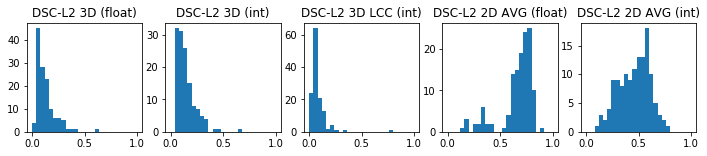



collating stats for base model densenet-pocket
number of files found:	 5 

..
DSC-L2 3D (float) 0.12983129957195308 0.07945315040673842
DSC-L2 3D (int) 0.1489031703155951 0.08569999108557609
DSC-L2 3D LCC (int) 0.0803537393594278 0.05313508001108038
DSC-L2 2D AVG (float) 0.6639991724641684 0.15721070644587212
DSC-L2 2D AVG (int) 0.41795281233014075 0.14854909946114261


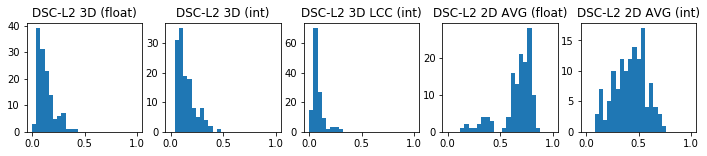



collating stats for base model densenet-c2Dt
number of files found:	 5 

..
DSC-L2 3D (float) 0.10860622176637363 0.07423210742166843
DSC-L2 3D (int) 0.1242534314611946 0.07932382112513253
DSC-L2 3D LCC (int) 0.07820004484547412 0.06016101769343896
DSC-L2 2D AVG (float) 0.6582830130113388 0.16118411143708666
DSC-L2 2D AVG (int) 0.341043425798576 0.13956357982206263


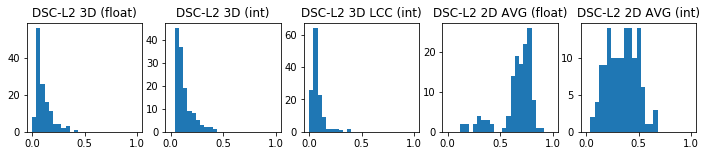



collating stats for base model densenet-pocket-c2Dt
number of files found:	 5 

..
DSC-L2 3D (float) 0.11813901190773515 0.06700668370405875
DSC-L2 3D (int) 0.13626162286885857 0.07151044881522298
DSC-L2 3D LCC (int) 0.08483570714778114 0.05729611525382215
DSC-L2 2D AVG (float) 0.664000523842931 0.15745947829867057
DSC-L2 2D AVG (int) 0.412298826295326 0.1499339148740794


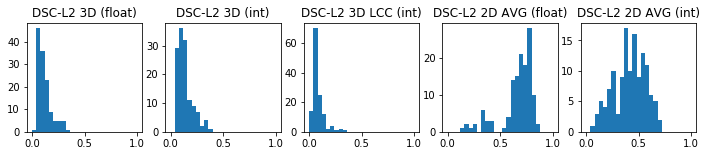

In [61]:
# modeltypes = ['unet', 'resnet', 'densenet']
results_dict = {}
for mtype in modeltypes:
    results_dict[mtype] = collate_model_comparisons(mtype, separate_folds=False, locroot='../model-comparisons/')

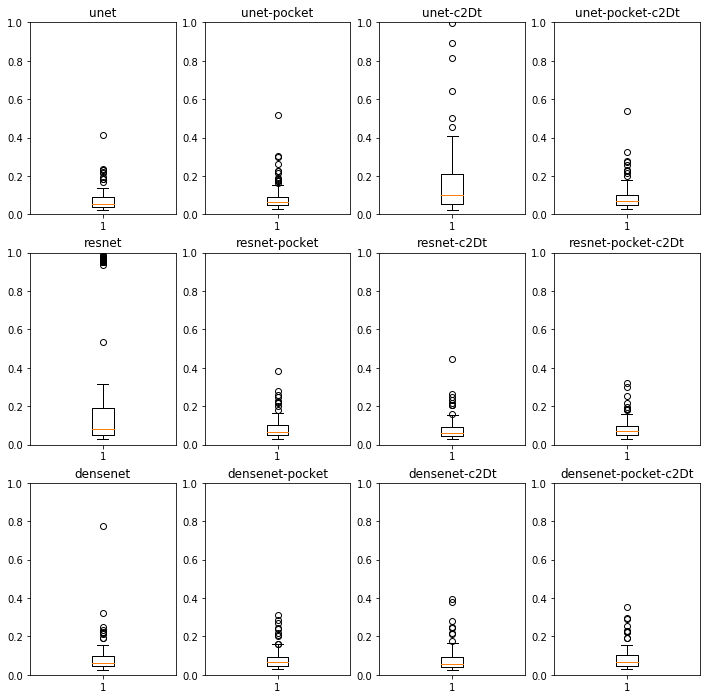

In [72]:
plt.figure(figsize=(12,12))
idx = 0
for model in results_dict:
    idx += 1
    metric = list(results_dict[model].keys())[2]
    this_model_results = results_dict[model][metric]
    ax = plt.subplot(3,4,idx)
    plt.boxplot(this_model_results)
    plt.ylim([0,1])
    ax.set_title(model)
plt.savefig('dsc-comp-boxplot.png')
plt.show()

    

In [81]:
import scipy
from scipy.stats import wilcoxon, mannwhitneyu

model_names = [('unet', 'unet-pocket'),
               ('resnet', 'resnet-pocket'),
               ('densenet', 'densenet-pocket'),
               ('unet-c2Dt', 'unet-pocket-c2Dt'),
               ('resnet-c2Dt', 'resnet-pocket-c2Dt'),
               ('densenet-c2Dt', 'densenet-pocket-c2Dt')]
for model in model_names:
    print('Testing', model[0], 'vs.', model[1])
    metric = list(results_dict[model[0]].keys())[2]
    this_model_results_base = results_dict[model[0]][metric]
    this_model_results_pocket = results_dict[model[1]][metric]
    wiltest = wilcoxon(this_model_results_base, this_model_results_pocket, correction=True)
    print(wiltest, len(diff))
    diff = [r1 - r2 for r1, r2 in zip(this_model_results_base, this_model_results_pocket)]
    wiltest2 = wilcoxon(diff, correction=True)
    print(wiltest2, len(diff))
    mwtest = mannwhitneyu(this_model_results_base, this_model_results_pocket)
    print(mwtest, len(diff))
    print('\n')

Testing unet vs. unet-pocket
WilcoxonResult(statistic=1959.0, pvalue=5.6508581248174025e-08) 131
WilcoxonResult(statistic=1959.0, pvalue=5.6508581248174025e-08) 131
MannwhitneyuResult(statistic=7381.0, pvalue=0.02528784936899207) 131


Testing resnet vs. resnet-pocket
WilcoxonResult(statistic=3763.0, pvalue=0.19868672947016108) 131
WilcoxonResult(statistic=3763.0, pvalue=0.19868672947016108) 131
MannwhitneyuResult(statistic=7063.0, pvalue=0.006688228160159181) 131


Testing densenet vs. densenet-pocket
WilcoxonResult(statistic=3722.0, pvalue=0.16774413025600565) 131
WilcoxonResult(statistic=3722.0, pvalue=0.16774413025600565) 131
MannwhitneyuResult(statistic=8212.0, pvalue=0.2742356134633799) 131


Testing unet-c2Dt vs. unet-pocket-c2Dt
WilcoxonResult(statistic=2534.0, pvalue=3.9806131848185234e-05) 131
WilcoxonResult(statistic=2534.0, pvalue=3.9806131848185234e-05) 131
MannwhitneyuResult(statistic=6308.0, pvalue=0.00010583216053632154) 131


Testing resnet-c2Dt vs. resnet-pocket-c2Dt
